In [1]:
import pygame as pg

from math import pi, sin, cos

white = (255, 255, 255)
gray = (100, 100, 100)
black = (0, 0, 0)

radius_scale = 100


def main():
    time = 0
    path = []

    pg.init()
    pg.font.init()
    font = pg.font.SysFont('Consolas', 24)

    pg.display.set_caption("Fourier")

    # CONFIG
    width = 1000
    height = 1000

    start_x = 300
    start_y = 500

    wave_x = 700

    terms = 2
    time_step = 0.005
    max_points = 2000

    wave_choice = 1  # default to square (map at end of file)
    ###############

    screen = pg.display.set_mode((width, height))

    text = ["Select a wave:",
            "1: Square     2: Sawtooth     3: Triangle",
            "Up/Down: Number of terms     Left/Right: Speed"]

    running = True
    pg.event.set_allowed([pg.QUIT, pg.KEYDOWN, pg.KEYUP])

    while running:
        for event in pg.event.get():
            if event.type == pg.QUIT:
                running = False
            if event.type == pg.KEYDOWN:
                keys = pg.key.get_pressed()
                key = event.unicode
                if keys[pg.K_ESCAPE]:
                    running = False
                if keys[pg.K_UP]:
                    terms += 1
                if keys[pg.K_DOWN] and terms > 1:
                    terms -= 1
                if keys[pg.K_LEFT] and time_step > 0.001:
                    time_step -= 0.001
                if keys[pg.K_RIGHT]:
                    time_step += 0.001
                if key == '1':
                    print("switching to square wave")
                    wave_choice = 1
                if key == '2':
                    print("switching to sawtooth wave")
                    wave_choice = 2
                if key == '3':
                    print("switching to triangle wave")
                    wave_choice = 3

        x = start_x
        y = start_y

        # mark center point of circles
        pg.draw.circle(screen, (255, 0, 0), (round(x), round(y)), 3)

        circles = []
        lines = [(start_x, start_y)]

        for i in range(0, terms):
            prev_x = x
            prev_y = y

            n, radius = waves[wave_choice](i)

            # prevent "width greater than radius" exception
            if abs(radius) < 1:
                terms -= 1
                break

            x += radius * cos(n * time)
            y += radius * sin(n * time)

            circles.append(((round(prev_x), round(prev_y)), round(abs(radius))))
            lines.append((x, y))

        # draw circles first, then lines for clarity
#         print([circle[1] for circle in circles])
        for circle in circles:
            pg.draw.circle(screen, gray, circle[0], circle[1], 1)

        for i in range(0, len(lines) - 1):
            pg.draw.line(screen, white, lines[i], lines[i + 1], 2)

        # draw line from circles to wave
        pg.draw.line(screen, gray, (x, y), (wave_x, y), 2)
        path = add_point(path, [wave_x, y], time_step * 50, max_points)
        draw_path(screen, path)

        message_box(screen, font, text)
        pg.display.update()
        screen.fill(black)

        time += time_step


def add_point(path, point, x_increment, max_points):
    path = [[point[0] + x_increment, point[1]] for point in path]

    path.insert(0, point)
    return path[:max_points]


def draw_path(screen, path):
    if len(path) > 1:
        pg.draw.lines(screen, white, False, path, 2)


def message_box(root, font, text):
    pos = 10
    for x in range(len(text)):
        rendered = font.render(text[x], 0, white)
        root.blit(rendered, (10, pos))
        pos += 30


def square_wave(i):
    n = 2 * i + 1
    radius = radius_scale * (4 / (n * pi))

    return n, radius


def sawtooth_wave(i):
    n = i + 1
    radius = radius_scale * (2 * (-1 ** (n + 1)) / (n * pi))

    return n, radius


def triangle_wave(i):
    n = 2 * i + 1
    # radius = radius_scale * 2 * (pi / 4) * (-1 ** i) * (n ** -2)
    radius = (radius_scale * 3) * (4 * (1 - (-1 ** n))/ ((pi ** 2) * (n ** 2)))

    return n, radius


waves = {1: square_wave,
         2: sawtooth_wave,
         3: triangle_wave}


if __name__ == "__main__":

    main()


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
# # -*- coding: utf-8 -*-
# #
# import os
# import requests
# import shutil
# import hashlib


# def download_image(name, sha3):
#     filename = os.path.join("/tmp", name)
#     if not os.path.exists(filename):
#         print("Downloading {}...".format(name))
#         url = "https://github.com/nschloe/epicycler/raw/gh-pages/"
#         r = requests.get(url + name, stream=True)
#         if not r.ok:
#             raise RuntimeError(
#                 "Download error ({}, return code {}).".format(r.url, r.status_code)
#             )
#         # save the mesh in /tmp
#         with open(filename, "wb") as f:
#             r.raw.decode_content = True
#             shutil.copyfileobj(r.raw, f)

#     # check hash
#     file_sha3 = hashlib.sha3_224(open(filename, "rb").read()).hexdigest()

#     if file_sha3 != sha3:
#         raise RuntimeError("Checksums not matching ({} != {}).".format(file_sha3, sha3))

#     return filename


In [15]:
# -*- coding: utf-8 -*-
#

__author__ = u"Nico Schlömer"
__email__ = "nico.schloemer@gmail.com"
__copyright__ = u"Copyright (c) 2018, {} <{}>".format(__author__, __email__)
__credits__ = []
__license__ = "License :: OSI Approved :: MIT License"
__version__ = "0.1.0"
__maintainer__ = u"Nico Schlömer"
__status__ = "Development Status :: 3 - Alpha"


In [16]:
# -*- coding: utf-8 -*-
#

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy
import tspsolve

def plot(polygon):
    n = polygon.shape[0]
    a = numpy.fft.fft(polygon[:, 0] + 1j * polygon[:, 1])
    freqs = numpy.fft.fftfreq(n)

    t = numpy.linspace(0.0, 2 * numpy.pi, 1000)
    # In principle, this is the inverse transform with a higher sampling rate.
    vals = numpy.sum(a / n * numpy.exp(1j * numpy.multiply.outer(t, n * freqs)), axis=1)

    plt.plot(vals.real, vals.imag, "-")
    plt.plot(polygon[:, 0], polygon[:, 1], ".")
    plt.axis("equal")
    plt.show()
    return


def animate_image(
    filename,
    xylim="polygon",
    output_filename=None,
    cutoff_radius=0.0,
    pixel_opacity_threshold=0.9,
):
    img = plt.imread(filename)

    # Find all pixel positions where the alpha value is greater than a threshold
    yx = numpy.array(numpy.where(img[:, :, 3] > pixel_opacity_threshold))
    xy = yx[[1, 0]]

    # prepare matrix of distances
    dx = numpy.subtract.outer(xy[0], xy[0])
    dy = numpy.subtract.outer(xy[1], xy[1])
    d = numpy.sqrt(dx ** 2 + dy ** 2)
    # solve tsp
    path = tspsolve.nearest_neighbor(d)
    path = tspsolve.two_opt(d, path).tolist()

    # plt.plot(xy[0, path + [path[0]]], xy[1, path + [path[0]]], "-")
    # plt.axis("square")
    # plt.gca().invert_yaxis()
    # plt.show()

    # r = list(range(xy.shape[1]))
    # dist = {(i, j): d[i][j] for i in r for j in r}
    # path = tsp.tsp(r, dist)
    # print(path)
    # exit(1)

    animate_poly(
        xy[:, path].T,
        xylim=xylim,
        output_filename=output_filename,
        cutoff_radius=cutoff_radius,
        invert_yaxis=True,
        show_axes=False,
    )
    return


def animate_poly(
    polygon,
    xylim="polygon",
    show_axes=True,
    output_filename=None,
    cutoff_radius=0.0,
    invert_yaxis=False,
):
    n = polygon.shape[0]
    a = numpy.fft.fft(polygon[:, 0] + 1j * polygon[:, 1])
    freqs = numpy.fft.fftfreq(n)

    fig, ax = plt.subplots()

    # Make the plot tighter, <https://stackoverflow.com/a/15883620/353337>
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=None, hspace=None)

    ax.axis("square")

    radii = numpy.abs(a / n)

    cut = radii > cutoff_radius
    a = a[cut]
    radii = radii[cut]
    freqs = freqs[cut]

    new_red = "#d62728"
    dot = plt.plot([], [], ".", color=new_red)[0]
    circles = [
        plt.Circle((0.0, 0.0), radius, color="k", fill=False) for radius in radii[1:]
    ]
    for circle in circles:
        ax.add_artist(circle)

    if xylim == "polygon":
        xlim = [numpy.min(polygon[:, 0]), numpy.max(polygon[:, 0])]
        ylim = [numpy.min(polygon[:, 1]), numpy.max(polygon[:, 1])]
        width = xlim[1] - xlim[0]
        height = ylim[1] - ylim[0]
        xlim = [xlim[0] - 0.1 * width, xlim[1] + 0.1 * width]
        ylim = [ylim[0] - 0.1 * height, ylim[1] + 0.1 * height]
    elif xylim == "circles":
        sum_radii = numpy.sum(radii[1:])
        center0 = [a[0].real / n, a[0].imag / n]
        xlim = [center0[0] - 1.1 * sum_radii, center0[0] + 1.1 * sum_radii]
        ylim = [center0[1] - 1.1 * sum_radii, center0[1] + 1.1 * sum_radii]
    else:
        assert len(xylim) == 4
        xylim = [float(x) for x in xylim]
        xlim = xylim[:2]
        ylim = xylim[2::]

    ax.set_xlim([xlim[0], xlim[1]])
    ax.set_ylim([ylim[0], ylim[1]])

    if invert_yaxis:
        ax.invert_yaxis()

    if not show_axes:
        ax.axis("off")

    plt.plot(polygon[:, 0], polygon[:, 1], ".", color="0.7")

    def init():
        return circles + [dot]

    def animate(t):
        vals = a / n * numpy.exp(1j * numpy.multiply.outer(t, n * freqs))
        cs = numpy.cumsum(vals)
        centers = cs[:-1]
        for circle, center in zip(circles, centers):
            circle.center = [center.real, center.imag]
        dot.set_data(cs[-1].real, cs[-1].imag)
        return circles + [dot]

    num_frames = 1000

    anim = FuncAnimation(
        fig,
        animate,
        init_func=init,
        frames=numpy.linspace(0.0, 2 * numpy.pi, num_frames),
        interval=10,
        blit=True,
    )

    if output_filename:
        anim.save(
            output_filename,
            fps=60,
            # writer="imagemagick",
            # extra_args=['-vcodec', 'libx264']
        )
    else:
        plt.show()
    return


In [17]:
# -*- coding: utf-8 -*-
#
from __future__ import print_function

import argparse
import sys

import numpy

# from .__about__ import __version__
# from .main import animate_image, animate_poly


def image(argv=None):
    # Parse command line arguments.
    parser = _get_parser_image()
    args = parser.parse_args(argv)

    animate_image(
        args.infile,
        xylim=args.xylim,
        output_filename=args.output_file,
        cutoff_radius=args.cutoff_radius,
    )
    return


def _get_parser_image():
    parser = argparse.ArgumentParser(
        description=("Create epicycle animation from image.")
    )

    parser.add_argument("infile", type=str, help="input image file")

    parser.add_argument(
        "--xylim",
        nargs="+",
        help="xlim, ylim for plot (default: deduce from coordinates)",
        default="polygon",
    )

    parser.add_argument(
        "--cutoff-radius",
        "-c",
        type=float,
        help="epicycles smaller than this radius will be left out (default: 0.0)",
        default=0.0,
    )

    parser.add_argument(
        "--output-file",
        "-o",
        type=str,
        help="output file (default: none, show on screen)",
        default=None,
    )

    parser.add_argument(
        "--version",
        "-v",
        action="version",
        version="%(prog)s {}, Python {}".format(__version__, sys.version),
        help="display version information",
    )

    return parser


def poly(argv=None):
    parser = _get_parser_poly()
    args = parser.parse_args(argv)

    assert len(args.coords) % 2 == 0, "Must specify an even number of values."

    animate_poly(
        numpy.reshape(args.coords, (-1, 2)),
        xylim=args.xylim,
        output_filename=args.output_file,
        show_axes=args.show_axes,
    )
    return


def _get_parser_poly():
    parser = argparse.ArgumentParser(
        description=("Create epicycle animation from a list of points.")
    )

    parser.add_argument(
        "coords", type=float, nargs="+", help="input point coordinates (x0 y0 x1 y1...)"
    )

    parser.add_argument(
        "--xylim",
        nargs="+",
        help="xlim, ylim for plot (default: deduce from coordinates)",
        default="polygon",
    )

    parser.add_argument(
        "--show-axes",
        "-a",
        action="store_true",
        help="show coordinate axes (default: false)",
        default=False,
    )

    parser.add_argument(
        "--output-file",
        "-o",
        type=str,
        help="output file (default: none, show on screen)",
        default=None,
    )

    parser.add_argument(
        "--version",
        "-v",
        action="version",
        version="%(prog)s {}, Python {}".format(__version__, sys.version),
        help="display version information",
    )
    return parser


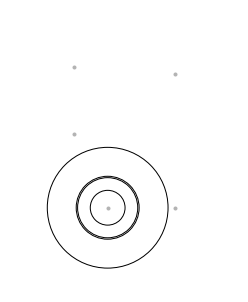

In [18]:
# -*- coding: utf-8 -*-
#
import numpy

# import epicycler

# from helpers import download_image


def test_plot():
    polygon = numpy.array([[0.0, 0.0], [1.0, 0.0], [1.0, 1.0], [0.0, 1.1]])
    plot(polygon)
    return


def test_cli_poly():
    poly(
        [
            "0.0",
            "0.0",
            "1.0",
            "0.0",
            "1.0",
            "2.0",
            "-0.5",
            "1.1",
            "-0.5",
            "2.1",
            "--xylim",
            "-1.5",
            "+2.0",
            "-1.3",
            "3.0",
        ]
    )
    return


def test_cli_image():
#     filename = download_image(
#         "seagull.png", "79ab5c6a3ce01135009fcdc1a555c692eb35fe0cb0b3eddbe9d58251"
#     )
    image(
        [
            filename,
            "-c",
            "0.5",
            # "-o", "seagull.mp4"
        ]
    )
    return


if __name__ == "__main__":
    test_cli_poly()
#     test_cli_image()


In [5]:
# from PIL import Image
# from array import array
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# from numpy.linalg import norm, det

# #load the image data into a numpy array
# img = Image.open(r"C:\Users\Vicky Kumar\Desktop\GitHub Code\epicycles-master\resource\icon.tiff")
# img_data = np.asarray(img)

# #perform the 2D fast Fourier transform on the image data and...
# fourier = np.fft.fft2(img_data)
# fourier = np.fft.fftshift(fourier)
# fourier = abs(fourier)
# fourier = np.log10(fourier)

# #calculate the original contrast range
# lowest = np.nanmin(fourier[np.isfinite(fourier)])
# highest = np.nanmax(fourier[np.isfinite(fourier)])
# original_range = highest - lowest

# #convert the normalized data into an image
# norm_fourier = (highest - lowest) / original_range * 255
# norm_fourier_img = Image.fromarray(norm_fourier)

# #display the original image and the Fourier image
# fig = plt.figure()
# ax1 = fig.add_subplot(121)
# ax2 = fig.add_subplot(122)
# ax1.imshow(img, cmap = "gray")
# ax2.imshow(norm_fourier_img)
# ax1.title.set_text("Original Image")
# ax2.title.set_text("Fourier Image")
# plt.show()

# #show the normalized Fourier image
# norm_fourier_img.show()

# #convert the output image to 8-bit pixels (grayscale) and save it
# norm_fourier_img.convert("L").save("test.bnp")

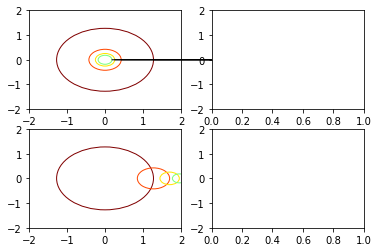

In [19]:
import numpy as np
from scipy.signal import square
from matplotlib import animation
from matplotlib import pyplot as plt
from matplotlib.patches import ConnectionPatch

t = np.linspace(0, 1, 500, endpoint=False)
sq_wave = square(2*np.pi*t)

def bn(n, points, t):
   b = points*(np.sin(2*n*np.pi*t))
   return 2*b.sum()/points.size

bn_lst = []
sq_mat = np.zeros((4, 500), dtype = np.complex_)
for idx, i in enumerate((1,3,5,7)):
   bn_lst.append(bn(i, sq_wave, t))
   sq_mat[idx, :] = bn_lst[idx] * np.exp(1j*2*np.pi*i*t)
sq_mat_circ = np.add.accumulate(sq_mat, 0)

fig = plt.figure(1)
ax_1 = fig.add_subplot(221)
ax_2 = fig.add_subplot(222)
ax_3 = fig.add_subplot(223)
ax_4 = fig.add_subplot(224)

cmap = plt.get_cmap('jet_r')
N = 6

draw_lst = [ax_2.plot(0,0, color = cmap(i/N))[0] for i in range(4)] + [ax_3.plot(0,0, color = cmap(4/N))[0]] + [ax_4.plot(0,0, color = cmap(5/N))[0]]
circle_lst = [plt.Circle((0,0), bn_lst[i%4], alpha = 1, color = cmap(i%4/N), fill = False) for i in range(8)]
con_patch_lst = [ConnectionPatch(xyA=(0,0), xyB=(0,0), coordsA="data", coordsB="data", axesA=ax_1, axesB=ax_2, zorder=25) for i in range(5)]

for i in range(4):
   ax_1.add_patch(circle_lst[i])
   ax_1.add_artist(con_patch_lst[i])

for i in range(4, 8):
   ax_3.add_patch(circle_lst[i])
ax_3.add_artist(con_patch_lst[-1])

ax_2.set_zorder(-1)
ax_4.set_zorder(-1)

def ani(i):
   for j in range(4):
      con_patch_lst[j].remove()
      con_patch_lst[j] = ConnectionPatch(xyA=(sq_mat[j, i].real, sq_mat[j, i].imag), xyB=(t[i], sq_mat[j, i].imag), coordsA="data", coordsB="data", axesA=ax_1, axesB=ax_2, zorder=25)
      ax_1.add_artist(con_patch_lst[j])
      draw_lst[j].set_data(t[:i], sq_mat[j, :i].imag)
   for j in range(5, 8):
      circle_lst[j].center = (sq_mat_circ[j-5, i].real, sq_mat_circ[j-5, i].imag)
   con_patch_lst[-1].remove()
   con_patch_lst[-1] = ConnectionPatch(xyA=(sq_mat_circ[-1, i].real, sq_mat_circ[-1, i].imag), xyB=(t[i], sq_mat_circ[-1, i].imag), coordsA="data", coordsB="data", axesA=ax_3, axesB=ax_4, zorder=25)
   ax_3.add_artist(con_patch_lst[-1])
   draw_lst[-2].set_data(sq_mat_circ[-1, :i].real, sq_mat_circ[-1, :i].imag)
   draw_lst[-1].set_data(t[:i], sq_mat_circ[-1, :i].imag)
   return ([])

ani = animation.FuncAnimation(fig, ani, np.arange(0, 500, i), interval=20, blit=True)
ax_1.set_xlim(-2,2)
ax_1.set_ylim(-2, 2)
ax_2.set_xlim(0,1)
ax_2.set_ylim(-2, 2)
ax_3.set_xlim(-2,2)
ax_3.set_ylim(-2, 2)
ax_4.set_xlim(0,1)
ax_4.set_ylim(-2, 2)
plt.show()